# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [5]:
# check for missing values
df.isnull().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

In [6]:
y = df['Label']
X = df.drop(['Label'], axis=1)

feature_cols = X.columns[X.columns.str.startswith('C') == False]


Standardize features by removing the mean and scaling to unit variance

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([4.08456679e+02, 8.65016832e-01, 1.22401799e+00, 9.24117683e+01,
        5.72807171e+01, 3.85249060e+00, 3.46836358e+00, 4.42788230e+00,
        4.28701434e+00, 7.26232559e+01, 3.80658798e+00, 2.38992493e+03,
        2.36033152e+02, 2.81604847e+00, 4.76815125e+00]),
 array([7.11298061e+02, 6.04678717e-01, 1.12353558e+01, 1.10561823e+03,
        8.06834101e+02, 2.02316943e+00, 2.12736291e+00, 9.94645547e-01,
        9.92450338e-01, 2.71188480e+02, 1.03948577e+00, 4.99880340e+04,
        9.98159050e+02, 1.49732502e+00, 3.63700829e-01]))

In [8]:
X.shape, y.shape

((138721, 15), (138721,))

In [9]:
X_ = pd.DataFrame(X)

In [10]:
X_.rename(columns=dict(zip(X_,feature_cols)), inplace=True)
X_.head(2)

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
0,2.237520,-1.430540,-0.108943,-0.083584,0.821692,0.599081,-1.432360,-3.132469,-3.748922,11.825543,-2.490107,-0.035827,0.390851,-1.039524,-0.062549
1,-0.487077,0.223231,-0.019939,0.988613,3.065177,-1.637774,-1.403863,-0.026655,0.214764,-0.039283,0.220314,-0.024095,0.951158,0.778101,0.421219


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=46, train_size = 0.7, test_size = 0.3)

X_train.head(2)

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
52765,-0.572835,0.223231,-0.108943,-0.083584,-0.070994,0.599081,0.765282,-1.102632,-0.963046,-0.267796,-0.266661,-0.044696,-0.081145,-1.190813,0.732665
92171,-0.572835,0.223231,-0.108943,-0.083584,-0.070994,0.771262,0.765282,1.141909,-0.479538,-0.267794,0.208082,-0.044429,-0.059478,-0.979160,0.750006


In [12]:
y_test.sum(), y_train.sum()

(225, 572)

# Exercise 15.1


Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:

- Accuracy
- F1-Score
- F_Beta-Score (Beta=10)

Comment about the results



- #### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=1e9)

In [14]:
logreg.fit(X_train, y_train.ravel())

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred_logR = logreg.predict(X_test)

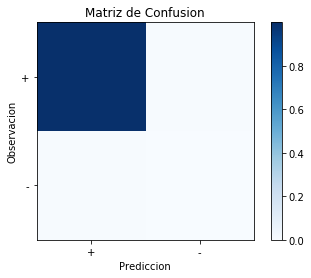




 Clasificación:
verdadero Positivos 99.46 %
verdadera Negativos: 0.0 %
Falsos negativos: 0.54 %
Falsos positivos: 0.0 %


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Confusion=confusion_matrix(y_test, y_pred_logR)
Confusion_norm= Confusion/Confusion.sum(axis=1)
n_sample=y_test.shape[0]

Clase=['+','-']
marca=np.arange(len(Clase))


print("\n")
plt.imshow(Confusion_norm, cmap=plt.cm.Blues,interpolation='None')
plt.title('Matriz de Confusion')
plt.xlabel('Prediccion')
plt.ylabel('Observacion')
plt.xticks(marca,Clase)
plt.yticks(marca,Clase)
plt.colorbar()
plt.show()

print("\n")
print("\n","Clasificación:")
print("verdadero Positivos",round((Confusion[0,0]/n_sample)*100,2),"%")
print("verdadera Negativos:",round((Confusion[0,1]/n_sample)*100,2),"%")
print("Falsos negativos:",round((Confusion[1,0]/n_sample)*100,2),"%")
print("Falsos positivos:",round((Confusion[1,1]/n_sample)*100,2),"%")

In [17]:
from sklearn.metrics import f1_score,accuracy_score,fbeta_score

print("F1 score:",f1_score(y_pred_logR, y_test,average='weighted'))
print("accuracy_score:",accuracy_score(y_pred_logR, y_test))
print("F_Beta-Score (Beta=10)" ,fbeta_score(y_pred_logR,y_test,average='weighted', beta=10) )

F1 score: 0.9972534076347611
accuracy_score: 0.9945695268760363
F_Beta-Score (Beta=10) 0.9946225328237087


- #### Decision Tree

In [18]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeClassifier
treeregressor = DecisionTreeClassifier(random_state=1)
treeregressor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
# list of values to try
max_depth_range = range(1,13)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=46)
    MSE_scores = cross_val_score(treereg, X_train,  y_train, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

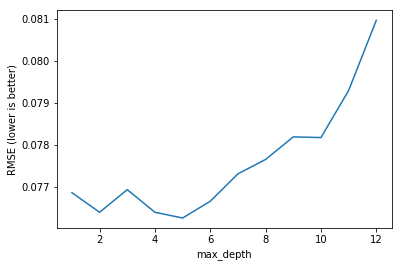

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [21]:
# max_depth=5 was best, so fit a tree using that parameter
treereg = DecisionTreeClassifier(max_depth=5, random_state=46)
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=46,
            splitter='best')

In [22]:
y_pred_tree= treereg.predict(X_test,check_input=True)

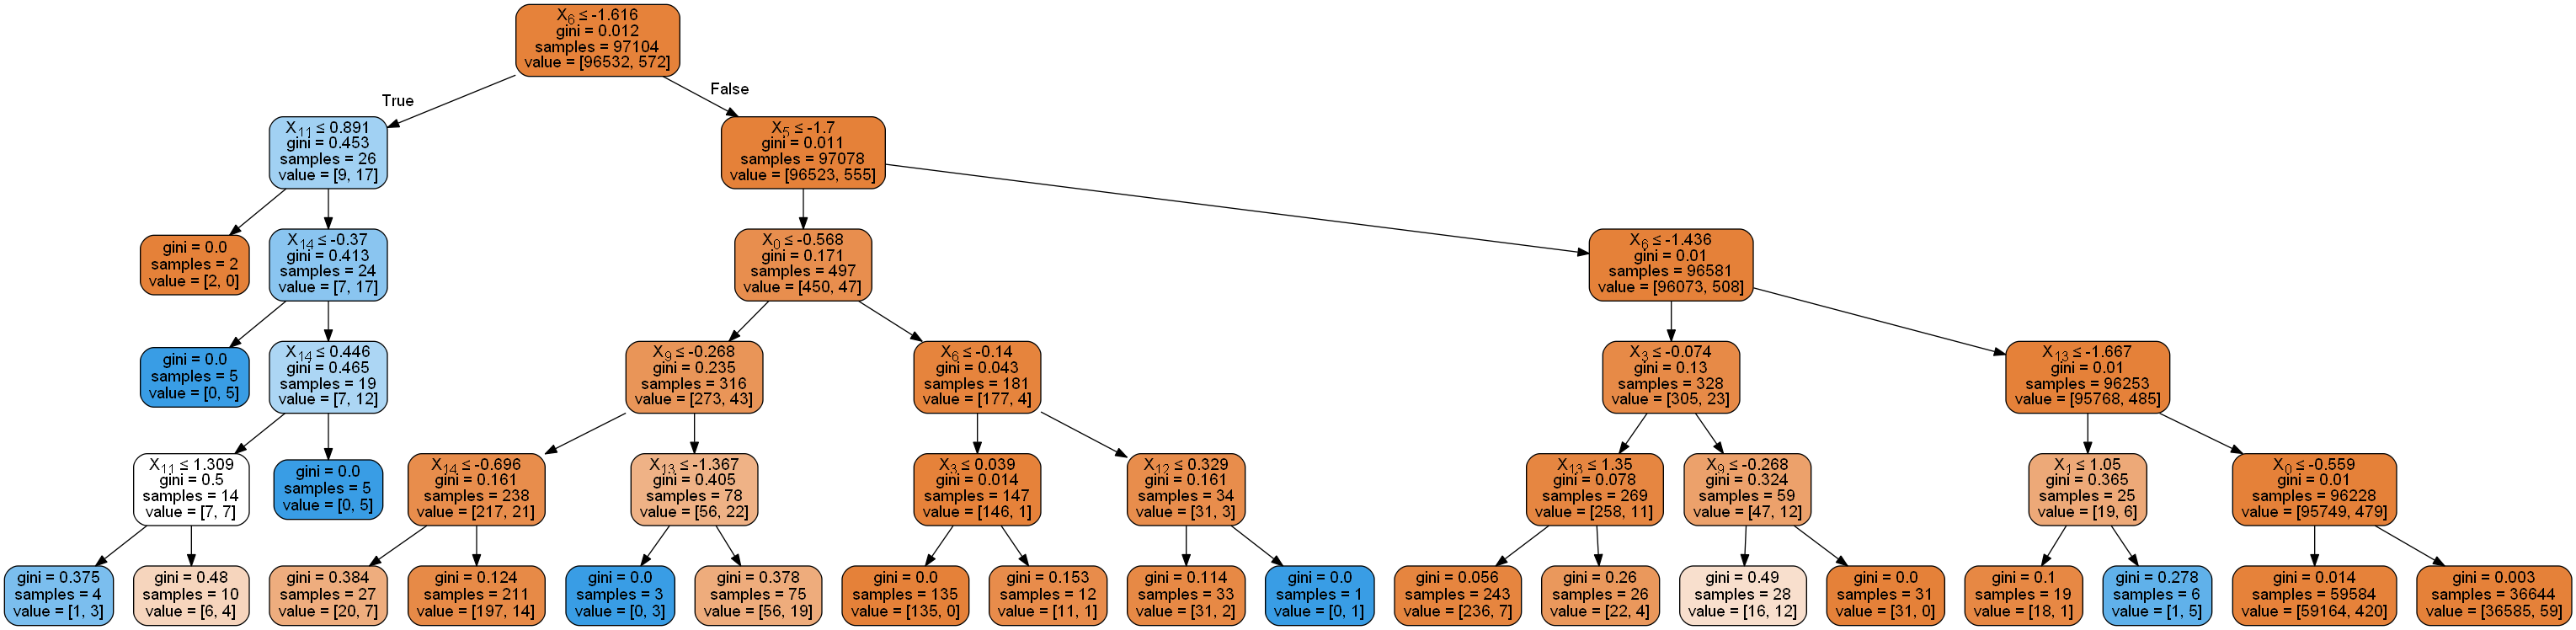

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(treereg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [24]:
from sklearn.metrics import f1_score,accuracy_score,fbeta_score

print("F1 score:",f1_score(y_pred_tree, y_test,average='weighted'))
print("accuracy_score:",accuracy_score(y_pred_tree, y_test))
print("F_Beta-Score (Beta=10)" ,fbeta_score(y_pred_tree,y_test,average='weighted', beta=10) )

F1 score: 0.9969983167110154
accuracy_score: 0.9945214695917534
F_Beta-Score (Beta=10) 0.9945565905018292


In [25]:
Results = pd.DataFrame()
Results["Index"] = ("Accuracy","F1Score","F_Beta-Score")
Results.set_index(["Index"], inplace=True)

In [26]:
Results["logreg"] = (accuracy_score(y_pred_logR, y_test),f1_score(y_pred_logR, y_test,average='weighted'),
                     fbeta_score(y_pred_logR, y_test,average='weighted', beta=10))
Results["Des_tree"] = (accuracy_score(y_pred_tree, y_test),f1_score(y_pred_tree, y_test,average='weighted'),
                     fbeta_score(y_pred_tree, y_test,average='weighted', beta=10))

Results

,logreg,Des_tree
Index,,
Accuracy,0.994570,0.994521
F1Score,0.997253,0.996998
F_Beta-Score,0.994623,0.994557


**Random Forest**

In [27]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

ranforest = RandomForestClassifier(random_state=46, n_jobs=-1)
ranforest.fit(X_train, y_train)
y_pred = ranforest.predict(X_test)

In [28]:
from sklearn import metrics

base = metrics.mean_absolute_error( y_test , y_pred )
base

0.005454501766105197

* #### *max_depth* parameter

In [29]:
max_depth_p = [base]

for Max_depth in range(1, 30, 1):
    ranforest = RandomForestClassifier(max_depth = Max_depth,
                                  random_state=6, n_jobs=-1)
    
    ranforest.fit(X_train, y_train)
    y_pred = ranforest.predict(X_test)
    
    max_depth_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

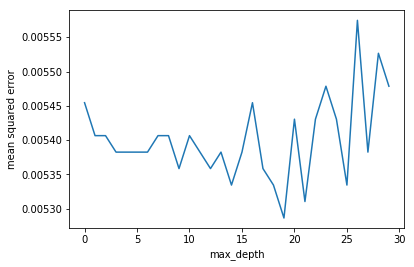

In [30]:
import matplotlib.pyplot as plt


max_depth_p_df = pd.DataFrame(max_depth_p)
max_depth_p_df.rename(columns={0 : 'max_depth'}, inplace=True)

plt.plot(max_depth_p_df)
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

In [31]:
if len(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()]) != 1:
    max_depth_choose = max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()][0]
else:
    if int(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()].index.values) != 0:
        max_depth_choose = int(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()].index.values)
    else:
        max_depth_choose = 'auto'
        
max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()]

,max_depth
19,0.005286


* #### *max_features* parameter

In [32]:
feature_cols = X_train.columns[X_train.columns.str.startswith('C') == False]
max_features_p = [base]

feature_range = range(1, len(feature_cols) + 1)

for Max_features in feature_range:
    ranforest = RandomForestClassifier(max_depth = max_depth_choose,
                                 max_features = Max_features,
                                 random_state=46, n_jobs=-1)
    
    ranforest.fit(X_train, y_train)
    y_pred = ranforest.predict(X_test)
    
    max_features_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

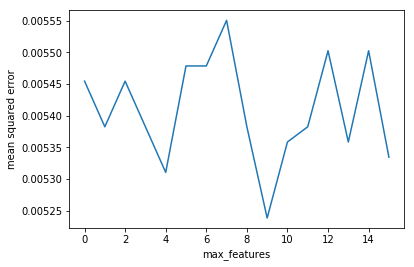

In [33]:
max_features_p_df = pd.DataFrame(max_features_p)
max_features_p_df.rename(columns = {0 : 'max_features'}, inplace=True)

plt.plot(max_features_p_df)
plt.xlabel('max_features')
plt.ylabel('mean squared error')

In [34]:
if len(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()]) != 1:
    max_features_choose = max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()][0]
else:
    if int(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()].index.values) != 0:
        max_features_choose = int(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()].index.values)
    else:
        max_features_choose = 'auto'

max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()]

,max_features
9,0.005238


* #### *n_estimators* parameter

In [35]:
n_estimators_p = [base]

for N_estimator in range(1, 15, 1):
    ranforest = RandomForestClassifier(max_depth = max_depth_choose,
                                 max_features = max_features_choose,
                                 n_estimators = N_estimator,
                                 random_state=46, n_jobs=-1)
    
    ranforest.fit(X_train, y_train)
    y_pred = ranforest.predict(X_test)
    
    n_estimators_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

Text(0, 0.5, 'mean_squared_error')

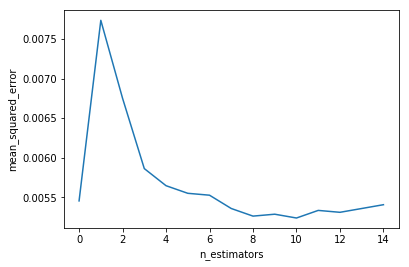

In [36]:
n_estimators_p_df = pd.DataFrame(n_estimators_p)
n_estimators_p_df.rename(columns = {0 : 'n_estimators'}, inplace=True)

plt.plot(n_estimators_p_df)
plt.xlabel('n_estimators')
plt.ylabel('mean_squared_error')

In [37]:
if len(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()]) != 1:
    n_estimators_choose = 'auto'
else:
    if int(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()].index.values) != 0:
        n_estimators_choose = 10 * int(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()].index.values)
    else:
        n_estimators_choose = 'auto'

n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()]

,n_estimators
10,0.005238


#### Models Random Forest training the Hiperparameter.

In [38]:
ranforest= RandomForestClassifier(max_depth = max_depth_choose, 
                             max_features = max_features_choose,
                             n_estimators = n_estimators_choose,
                             oob_score = True,
                             random_state = 46, 
                             n_jobs=-1)
ranforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=46, verbose=0, warm_start=False)

In [39]:
ranforest.fit(X_train, y_train)
y_pred_rand = ranforest.predict(X_test)

In [40]:
Results["Random_forest"] = (accuracy_score(y_pred_rand, y_test),f1_score(y_pred_rand, y_test,average='weighted'),
                     fbeta_score(y_pred_rand, y_test,average='weighted', beta=10))


Results

,logreg,Des_tree,Random_forest
Index,,,
Accuracy,0.994570,0.994521,0.994666
F1Score,0.997253,0.996998,0.996793
F_Beta-Score,0.994623,0.994557,0.994688


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

**Random under-sampling**

In [41]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  5719 y.mean() =  0.10001748557440111


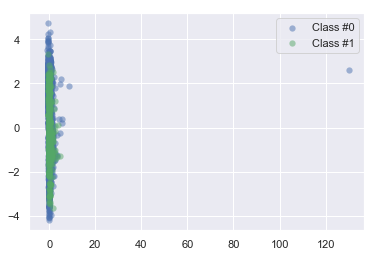

Target percentage 0.2
y.shape =  2862 y.mean() =  0.19986023759608665


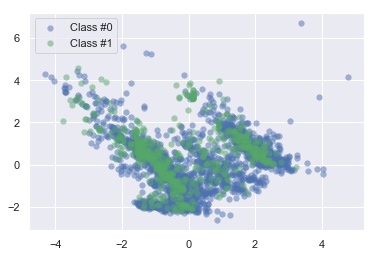

Target percentage 0.3
y.shape =  1860 y.mean() =  0.30752688172043013


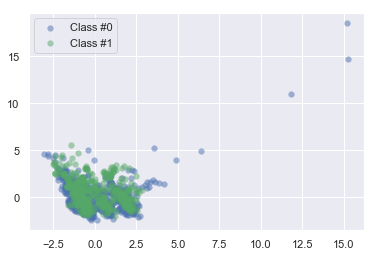

Target percentage 0.4
y.shape =  1390 y.mean() =  0.4115107913669065


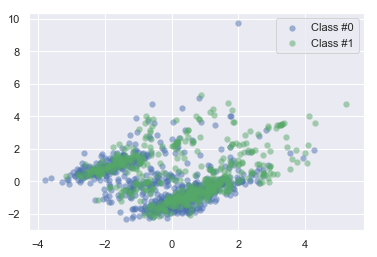

Target percentage 0.5
y.shape =  1110 y.mean() =  0.5153153153153153


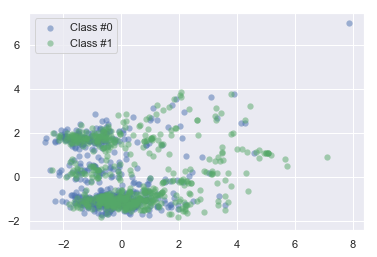

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train.values, y_train.values, target_percentage, 1)  
    pca = PCA(n_components=2)
    pca.fit(X_u)
    X_pca = pca.transform(X_u)    
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    # Plot the two classes
    palette = sns.color_palette()
    plt.scatter(X_pca[y_u==0, 0], X_pca[y_u==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
    plt.scatter(X_pca[y_u==1, 0], X_pca[y_u==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
    plt.legend()
    plt.show()

#### it's Choose the best parameter variant of target percentage

In [43]:
models = {'Logreg':LogisticRegression(solver='liblinear', C=1e9),
          'treereg' : DecisionTreeClassifier(max_depth=5, random_state=46),
         'ranforets':RandomForestClassifier(max_depth = 19,max_features = 3,
                             n_estimators = 6 ,oob_score = True,random_state = 6,n_jobs=-1)}

keys= models.keys()
keys

dict_keys(['Logreg', 'treereg', 'ranforets'])

**The best parameters**

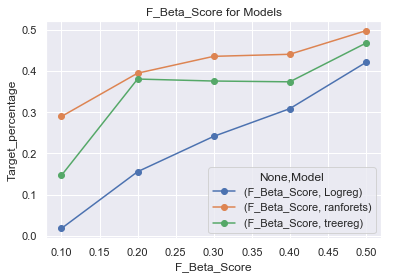

In [44]:
import warnings
warnings.filterwarnings('ignore')

y_pred_u = pd.DataFrame(columns=models.keys())
results_u = []

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for model in models.keys():
        X_u, y_u = UnderSampling(X_train.values, y_train.values, target_percentage, seed=4)
        models[model].fit(X_u, y_u)
        y_pred_u[model] = models[model].predict(X_test)
        results_u.append({'Accuracy': metrics.accuracy_score(y_test, y_pred_u[model]),
                        'F1_Score': metrics.f1_score(y_test, y_pred_u[model]),
                        'F_Beta_Score': metrics.fbeta_score(y_test, y_pred_u[model], beta=10),
                         'Model': model,
                        'Target_percentage':target_percentage})

results_u = pd.DataFrame(results_u)
results_u.sort_values('F_Beta_Score', inplace=True, ascending=False)
results_u_f_b = results_u[["F_Beta_Score","Model","Target_percentage"]].groupby(["Target_percentage","Model"]).mean().unstack()
results_u_f_b.plot(style='o-')
plt.title("F_Beta_Score for Models")
plt.ylabel('Target_percentage')
plt.xlabel('F_Beta_Score')
plt.show()

Now, training is the best parameter for target percentage wich is 0.5 for this case. 

In [82]:
results_d_u=results_u[results_u['Target_percentage'] == 0.5]

results_d_u['process'] =['under-sampling','under-sampling','under-sampling']
results_d_u['K'] =[0,0,0]
results_d_u

,Accuracy,F1_Score,F_Beta_Score,Model,Target_percentage,process,K
14,0.767955,0.031880,0.497953,ranforets,0.5,under-sampling,0
13,0.836149,0.038358,0.467752,treereg,0.5,under-sampling,0
12,0.671841,0.021635,0.420903,Logreg,0.5,under-sampling,0


# Exercise 15.3

Same analysis using random-over-sampling

In [46]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  107257 y.mean() =  0.09999347361943743


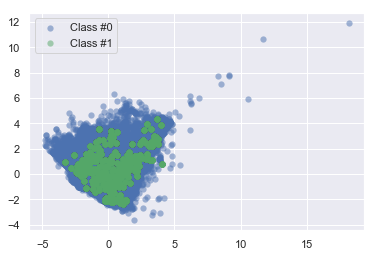

Target percentage 0.2
y.shape =  120665 y.mean() =  0.2


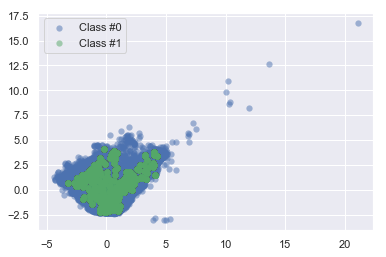

Target percentage 0.3
y.shape =  137902 y.mean() =  0.29999564908413223


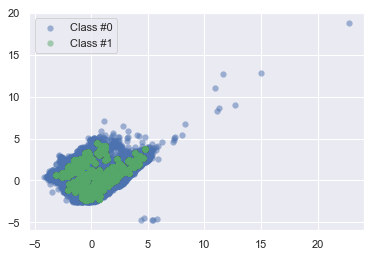

Target percentage 0.4
y.shape =  160886 y.mean() =  0.3999975137675124


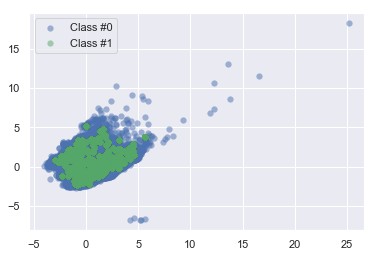

Target percentage 0.5
y.shape =  193064 y.mean() =  0.5


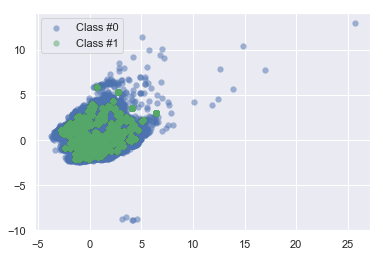

In [47]:

for target_percentage in [0.1,0.2,0.3,0.4,0.5]:
    X_o, y_o = OverSampling(X_train.values, y_train.values, target_percentage, 1)  
    print('Target percentage', target_percentage)
    print('y.shape = ',y_o.shape[0], 'y.mean() = ', y_o.mean())
    pca = PCA(n_components=2)
    pca.fit(X_o)
    X_pca_over = pca.transform(X_o)    
    # Plot the two classes
    palette = sns.color_palette()
    plt.scatter(X_pca_over[y_o==0, 0], X_pca_over[y_o==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
    plt.scatter(X_pca_over[y_o==1, 0], X_pca_over[y_o==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
    plt.legend()
    plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {'Logreg':LogisticRegression(solver='liblinear', C=1e9),
          'treereg' : DecisionTreeClassifier(max_depth=5, random_state=46),
         'ranforets':RandomForestClassifier(max_depth = 19,max_features = 3,
                             n_estimators = 6 ,oob_score = True,random_state = 6,n_jobs=-1)}

keys= models.keys()
keys

dict_keys(['Logreg', 'treereg', 'ranforets'])

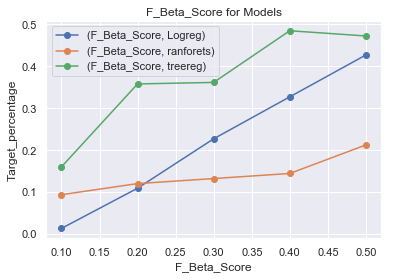

In [49]:
import warnings
warnings.filterwarnings('ignore')

y_pred_o = pd.DataFrame(columns=models.keys())
results_o = []

for target_percentage in [0.1,0.2,0.3,0.4,0.5]:
    for model in models.keys():
        X_o, y_o = OverSampling(X_train.values, y_train.values, target_percentage, 1)
        models[model].fit(X_o, y_o)
        y_pred_o[model] = models[model].predict(X_test)
        results_o.append({'Accuracy': metrics.accuracy_score(y_test, y_pred_o[model]),
                        'F1_Score': metrics.f1_score(y_test, y_pred_o[model]),
                        'F_Beta_Score': metrics.fbeta_score(y_test, y_pred_o[model], beta=10),
                         'Model': model,
                        'Target_percentage':target_percentage})

results_o = pd.DataFrame(results_o)
results_o.sort_values('F_Beta_Score', inplace=True, ascending=False)
results_o_f_b = results_o[["F_Beta_Score","Model","Target_percentage"]].groupby(["Target_percentage","Model"]).mean().unstack()
results_o_f_b.plot(style='o-')
plt.title("F_Beta_Score for Models")
plt.ylabel('Target_percentage')
plt.xlabel('F_Beta_Score')
plt.legend()
plt.show()

Now, training is the best parameter for target percentage wich is 0.5 for this case

In [78]:
results_d_o=results_o[results_o['Target_percentage'] == 0.5]
results_d_o['process'] =['over-sampling','over-sampling','over-sampling']
results_d_o['K'] =[0,0,0]
results_d_o

,Accuracy,F1_Score,F_Beta_Score,Model,Target_percentage,process,K
13,0.838287,0.039121,0.472591,treereg,0.5,over-sampling,0
12,0.611409,0.019879,0.427182,Logreg,0.5,over-sampling,0
14,0.966744,0.067385,0.212551,ranforets,0.5,over-sampling,0


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE  

Which parameters did you choose? codigo- en el notebook.

In [51]:
def SMOTE(X_smote, y_smote, target_percentage=0.5, k=5, seed=None):
    
    
    n_samples = y_smote.shape[0]
    n_samples_0 = (y_smote == 0).sum()
    n_samples_1 = (y_smote == 1).sum()
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_smote.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y_smote[y_smote==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X_smote[y_smote==1][sel] - step * (X_smote[y_smote==1][sel] - X_smote[y_smote==1][nn_])
    
    X_smote = np.vstack((X_smote, new))
    y_smote = np.append(y_smote, np.ones(n_samples_1_new))
    
    return X_smote, y_smote

Target percentage 0.2 k  5
y.shape =  120665 y.mean() =  0.2


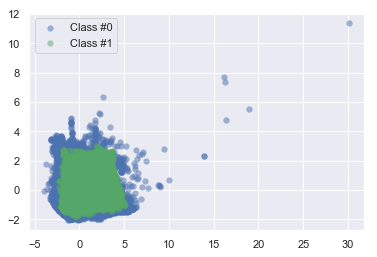

Target percentage 0.2 k  10
y.shape =  120665 y.mean() =  0.2


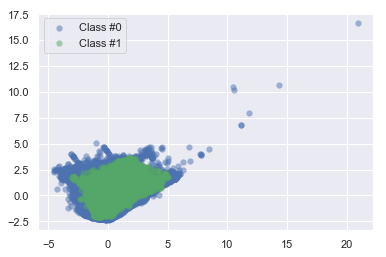

Target percentage 0.2 k  15
y.shape =  120665 y.mean() =  0.2


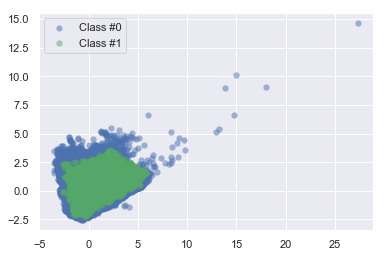

Target percentage 0.3 k  5
y.shape =  137902 y.mean() =  0.29999564908413223


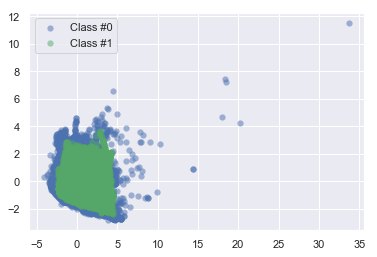

Target percentage 0.3 k  10
y.shape =  137902 y.mean() =  0.29999564908413223


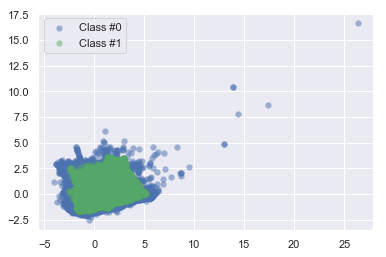

Target percentage 0.3 k  15
y.shape =  137902 y.mean() =  0.29999564908413223


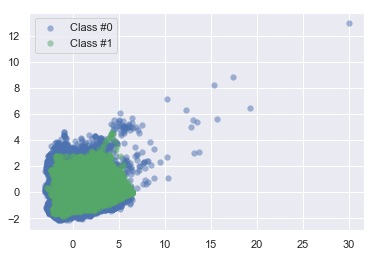

Target percentage 0.5 k  5
y.shape =  193064 y.mean() =  0.5


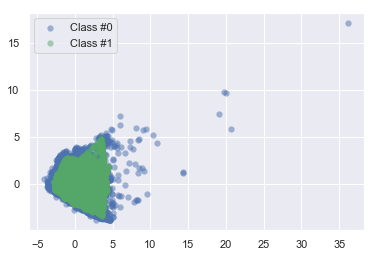

Target percentage 0.5 k  10
y.shape =  193064 y.mean() =  0.5


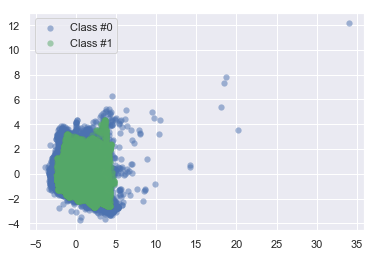

Target percentage 0.5 k  15
y.shape =  193064 y.mean() =  0.5


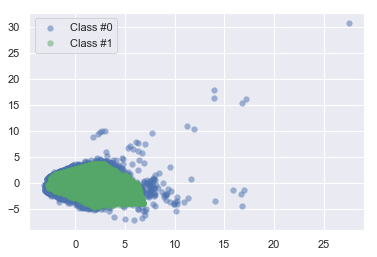

In [52]:

for target_percentage in [0.2,0.3,0.5]:
    for k in [5,10,15]:
        X_smote, y_smote = SMOTE(X_train.values, y_train, target_percentage, k, seed=3)
        pca = PCA(n_components=2)
        pca.fit(X_smote)
        X_pca_smote = pca.transform(X_smote) 
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_smote.shape[0], 'y.mean() = ', y_smote.mean())
        # Plot the two classes
        palette = sns.color_palette()
        plt.scatter(X_pca_smote[y_smote==0, 0], X_pca_smote[y_smote==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
        plt.scatter(X_pca_smote[y_smote==1, 0], X_pca_smote[y_smote==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
        plt.legend()
        plt.show()

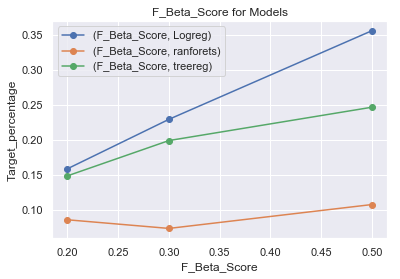

In [53]:
import warnings
warnings.filterwarnings('ignore')

y_pred_smote = pd.DataFrame(columns=models.keys())
results_smote = []

for target_percentage in [0.2,0.3,0.5]:
    for k in [15]:
        for model in models.keys():
            X_smote, y_smote = SMOTE(X_train.values, y_train, target_percentage, k, seed=3)
            models[model].fit(X_smote, y_smote)
            y_pred_smote[model] = models[model].predict(X_test)
            results_smote.append({'Accuracy': metrics.accuracy_score(y_test, y_pred_smote[model]),
                                  'F1_Score': metrics.f1_score(y_test, y_pred_smote[model]),
                                  'F_Beta_Score': metrics.fbeta_score(y_test, y_pred_smote[model], beta=10),
                                  'Model': model,
                                  'Target_percentage':target_percentage,
                                  'K':k})

results_smote = pd.DataFrame(results_smote)
results_smote.sort_values('F_Beta_Score', inplace=True, ascending=False)
results_smote_f_b = results_smote[["F_Beta_Score","Model","Target_percentage"]].groupby(["Target_percentage","Model"]).mean().unstack()
results_smote_f_b.plot(style='o-')
plt.title("F_Beta_Score for Models")
plt.ylabel('Target_percentage')
plt.xlabel('F_Beta_Score')
plt.legend()
plt.show()

Now, training is the best parameter for target percentage wich is 0.5 and K is 10 for this case

In [79]:
results_d_smote=results_smote[results_smote['Target_percentage'] == 0.5]
results_d_smote=results_d_smote[results_d_smote['K'] == 15]
results_d_smote['process'] =['smote-sampling','smote-sampling','smote-sampling']
results_d_smote

,Accuracy,F1_Score,F_Beta_Score,K,Model,Target_percentage,process
24,0.750246,0.021833,0.356099,15,Logreg,0.5,smote-sampling
25,0.925896,0.038653,0.245732,15,treereg,0.5,smote-sampling
26,0.981546,0.061125,0.109340,15,ranforets,0.5,smote-sampling


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

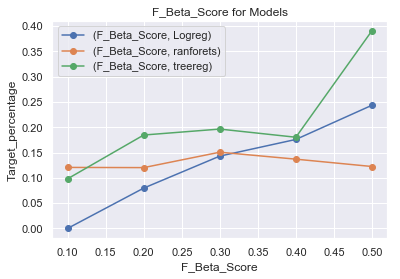

In [55]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

y_pred_ada = pd.DataFrame(columns=models.keys())
results_ada = []


for target_percentage in [0.1,0.2,0.3,0.4,0.5]:
    for model in models.keys():
        ada = ADASYN(ratio=target_percentage,random_state=42)
        X_ada, y_ada = ada.fit_resample(X_train.values, y_train.values)
        models[model].fit(X_ada, y_ada)
        y_pred_ada[model] = models[model].predict(X_test)
        results_ada.append({'Accuracy': metrics.accuracy_score(y_test, y_pred_ada[model]),
                        'F1_Score': metrics.f1_score(y_test, y_pred_ada[model]),
                        'F_Beta_Score': metrics.fbeta_score(y_test, y_pred_ada[model], beta=10),
                         'Model': model,
                        'Target_percentage':target_percentage})

results_ada = pd.DataFrame(results_ada)
results_ada.sort_values('F_Beta_Score', inplace=True, ascending=False)
results_ada_f_b = results_ada[["F_Beta_Score","Model","Target_percentage"]].groupby(["Target_percentage","Model"]).mean().unstack()
results_ada_f_b.plot(style='o-')
plt.title("F_Beta_Score for Models")
plt.ylabel('Target_percentage')
plt.xlabel('F_Beta_Score')
plt.legend()
plt.show()
                                              


Now, training is the best parameter for target percentage wich is 0.5 for this case

In [80]:
results_d_ada=results_ada[results_ada['Target_percentage'] == 0.5]
results_d_ada['process'] =['ada-sampling','ada-sampling','ada-sampling']
results_d_ada['K'] =[0,0,0]
results_d_ada

,Accuracy,F1_Score,F_Beta_Score,Model,Target_percentage,process,K
13,0.839008,0.032631,0.390843,treereg,0.5,ada-sampling,0
12,0.930293,0.040357,0.243537,Logreg,0.5,ada-sampling,0
14,0.981474,0.067715,0.122414,ranforets,0.5,ada-sampling,0


# Exercise 15.6 (3 points)

Compare and comment about the results.

In [83]:
resultds_c = pd.concat([results_d_u,results_d_o,results_d_smote, results_d_ada])
resultds_c.sort_values('F_Beta_Score', inplace=True, ascending=False)
resultds_c

,Accuracy,F1_Score,F_Beta_Score,K,Model,Target_percentage,process
14,0.767955,0.031880,0.497953,0,ranforets,0.5,under-sampling
13,0.838287,0.039121,0.472591,0,treereg,0.5,over-sampling
13,0.836149,0.038358,0.467752,0,treereg,0.5,under-sampling
12,0.611409,0.019879,0.427182,0,Logreg,0.5,over-sampling
12,0.671841,0.021635,0.420903,0,Logreg,0.5,under-sampling
13,0.839008,0.032631,0.390843,0,treereg,0.5,ada-sampling
24,0.750246,0.021833,0.356099,15,Logreg,0.5,smote-sampling
25,0.925896,0.038653,0.245732,15,treereg,0.5,smote-sampling
12,0.930293,0.040357,0.243537,0,Logreg,0.5,ada-sampling
14,0.966744,0.067385,0.212551,0,ranforets,0.5,over-sampling


In [84]:
results_c_f_b = resultds_c[["F_Beta_Score","Model","process"]].groupby(["process","Model"]).mean().unstack()
results_c_f_b 

F_Beta_Score                    
Model                Logreg ranforets   treereg
process                                        
ada-sampling       0.243537  0.122414  0.390843
over-sampling      0.427182  0.212551  0.472591
smote-sampling     0.356099  0.109340  0.245732
under-sampling     0.420903  0.497953  0.467752

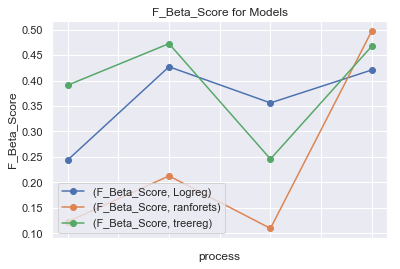

In [88]:
results_c_f_b.plot(style='o-')
plt.title("F_Beta_Score for Models")
plt.ylabel('F_Beta_Score')
plt.xlabel('process')
plt.legend(loc='lower left')
plt.show()

Para este caso el mejor estimador considerando F beta Score tiene un mejor comportamiento, bajo el supuesto que:

- Que los modelos Regresion lineal (logreg) se entrena con un C=1e9, para el arbol de decision con max depth de 5 y un random state de 46, tambien para el random Forest con unos hiperpartametros de max depth de 19, max features de 3 y n estimators de 6  para todo las corridas de simulacion.

Dando como resultado el mejor para este caso de fraude con un under sampling. en cualquiera de los modelos teniendo un entreno con el 50% de los datos.

